<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 1 / NOTE 1*

---

# Text Preprocessing for NLP

* 텍스트 토큰화(Tokenization)
* 불용어(Stopwords) 제거하기
* 표제어 추출(lemmatization)과 어간추출(stemming)

### Warm up

자연어처리, NLP(Natural Language Processing)에서 "Natural Language(자연어)" 란 사람들이 일상 샐활에 사용하는 언어를 말합니다.

자연어를 컴퓨터에게 이해시키는 작업이 NLP 입니다. 자연어는 프로그래밍 언어보다 훨씬 비구조적인 특성을 가집니다. 그래서 컴퓨터는 자연어를 이해하기가 어렵습니다.

특히 우리가 서로 대화할 때 섬세한 뜻을 전달하는 뉘앙스라든지, 풍자적인 말투, 아이러니한 상황 등을 컴퓨터가 이해하고 잘 구분하게 할 수 있을까요?

우리도 여전히 실수를 많이 하고 있는 상황인데, 컴퓨터에게도 쉽지는 않겠지요?

#### 자연어처리 관련 용어
- **코퍼스**(Corpus, 말뭉치)란 특정한 목적을 가지고 수집한 텍스트 데이터를 말합니다.
- **문서**(Document)란 문장(Sentence)들의 집합입니다
- **문장**(Sentence)이란 여러개의 **토큰**(단어, 형태소 등)으로 구성된 문자열 입니다. 마침표, 느낌표 같은 기호로 주로 구분됩니다.
- **어휘집합**(Vocabulary)는 코퍼스에 있는 모든 문서, 문장을 토큰화한 후 중복을 제거한 토큰의 집합을 말합니다.
    
#### 다음 영상들을 시청하세요
- [NLP for Developers: Tokenization | Rasa](https://youtu.be/Z_GGVn6LBRI)
- [Stemming to Consolidate Vocabulary](https://youtu.be/gBwGPI0srBE)
- [Stopwords - Intro to Machine Learning](https://youtu.be/E63RZli2F2o)


#### Conda 환경설정

Conda는 데이터사이언스 커뮤니티에서 가장 많이 사용하는 환경관리툴 입니다. 이번 유닛 부터는 Conda를 사용하여 파이썬 패키지 간의 의존성을 관리할 것입니다.

> __conda__: Package, dependency and environment management for any language—Python, R, Ruby, Lua, Scala, Java, JavaScript, C/ C++, FORTRAN, and more.

**가장 빠르고 쉽게 Conda를 사용하는 방법은 지금 여러분이 사용하는 운영체제에 바로 [Anaconda Individual Edition](https://www.anaconda.com/products/individual)을 설치하는 것 입니다.** 

Conda 인스톨 후 다음 가이드를 읽고 예시를 따라 진행해 보세요

- ["A Guide to Conda Environments"](https://towardsdatascience.com/a-guide-to-conda-environments-bc6180fc533)
- ["Setting started with conda"](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html)

#### 그럼 이제 NLP 스프린트를 진행하기 위한 환경을 마련해 보겠습니다:

1. 각자 운영체제에 있는 커맨드라인 툴을 오픈합니다. (터미널 or Anaconda Prompt)

2. `requirements.txt` 파일이 있는 폴더로 이동합니다.

3. `conda create -n P41_NLP python==3.7` 명령어를 실행해서 P41_NLP env를 생성합니다. env 명은 여러분이 원하시는 것을 사용해도 괜찮습니다.

4. `conda activate P41_NLP` 명령어를 실행해 생성한 환경으로 진입합니다. 진입에 성공하면 `conda install --force-reinstall -y --name P41_NLP -c conda-forge --file requirements.txt`을 실행하여 필요한 패키지를 설치합니다.

5. 설치가 잘 완료되면, `python -m ipykernel install --user --name P41_NLP --display-name P41_NLP` 를 실행하여 JupyterLab에서 이 커널을 선택할 수 있도록 합니다.

6. 마지막으로 Spacy의 언어 모델을 다운로드 받습니다. 다음 두 명령어를 차례로 실행합니다. `python -m spacy download en_core_web_md` `python -m spacy download en_core_web_lg`

7. 이제 모든 설정이 끝났습니다. `conda deactivate P41_NLP` 를 실행하여 환경에서 빠져 나온 후 JupyterLab을 실행하여 여러분이 추가한 P41_NLP 커널이 존재하는지 확인해 보세요.

---

자연어 처리로 첫 걸음을 내딛게 되신 것을 환영합니다. <br>
자연어 처리가 다루는 분야는 다양하지만, 본질은 우리 말을 컴퓨터가 알아듣게 하는 것입니다. 그 과정에서 필요한 기술들에 대해서 하나씩 공부해봅시다. 

이전 과정에서도 어느정도 다뤄보았겠지만, Python을 이용해서 텍스트를 다루는 연습도 하게됩니다. 텍스트를 단어로 분할하거나, 캐릭터로 변환하는 것, 그리고 단어를 단어 고유의 ID로 변환(벡터화)하는 방법들을 공부하게 될 것입니다. 

## NLP pipeline

한국어와 영어 등 우리가 쓰는 말을 자연어(Natural Language)라고합니다. 그러니 자연어 처리는 문자그대로 해석하면 우리의 말을 어떻게 처리할 것인지를 의미합니다. 우리가 python을 배우고 코딩하고있는 것처럼, 우리의 언어를 인식시키는 과정이라고 생각하면 됩니다. 코딩과 다른 점이라고 하면 규칙이 조금 더 유연하다는 특징이 있습니다. 그렇기 때문에 일반 코딩언어와는 다르게 조금 더 복잡한 과정이 필요하게 됩니다. 


<img src="https://i.imgur.com/Gfdf4Uz.png" width="700"/>

위와 같이 복잡한 과정들을 거쳐야 합니다. 

그러니 복잡한 언어를 컴퓨터로 넣기 위해서 우리가 살펴보아야 할 것들이 많이 있습니다. 단어의 의미, Thesaurus(유의어), 통계기반 기법, 추론 기반 기법(Word2Vec, 다음 수업에서 학습) 등을 알아야 합니다. 참고로 이 수업방식은 스탠퍼드 대학교의 커리큘럼(CS224d)을 참고하여 제작하였습니다. 

유의어 (Thesaurus, 시소러스)
  사람이 직접 의미를 입력해주어도 좋습니다. 사전이 대표적인 예시라고 할 수 있습니다. 사전에 하단을 보면, 보통 유의어, 동의어 등이 적혀있는 것을 보실 수 있습니다. 한편 상위개념과 하위개념도 있습니다. vehicle - car, train, bus 등이 알기쉬운 예시입니다. car의 추가 하위는 sedan, SUV, batch-back 등이 있을 수 있습니다. 
  이런 유의어 정보를 이용해서 단어들의 네트워크를 이용하면 단어사이의 유사도를 구할 수 있고, 이 외에도 우리에게 유용한 일들을 컴퓨터가 수행할 수 있게 됩니다. 

- WordNet : 자연어 분야의 가장 유명한 시소러스 (프린스턴 대학)

시소러스의 문제점, 
- 1) 사람이 정의한 것이기 때문에 시대에 따라서 변하는 특징이 있습니다. 우리가 배우고 있는 딥러닝도 20년 전에는 사용하지 않던 신조어입니다. 또 의미가 변하기도 합니다. 
- 2) 단어의 미묘한 차이를 표현하기가 어렵다. - 빈티지/레트로, 노랗다/누렇다 ?
- 3) 인건비 - 누군가는 정의를 해줘야 하기 때문입니다. 











### 통계 기반 기법, 말뭉치(corpus) 이용
  말뭉치라는 것은 단한히 말하면 대량의 텍스트 데이터입니다. 최근 데이터 경진대회들을 보면 트위터 글, 아마존 리뷰 등의 말뭉치 데이터들을 볼 수 있는데 이것이 대표적인 사례입니다. 이 데이터에는 사람들이 글을 어떻게 사용하는지가 담겨있기 때문에 단순히 데이터이지만, 그 활용성을 담고 있습니다. 이런 뭉치에서부터 통계적으로 유의미한 데이터를 추출하는데 목적이 있습니다. 

In [5]:
#말뭉치 전처리
text = "Hello world! nice to meet you! python is nice language!"
text = text.lower()
text = text.replace('!', ' .')
text

'hello world . nice to meet you . python is nice language .'

In [6]:
# split words
word = text.split(' ')
word

['hello',
 'world',
 '.',
 'nice',
 'to',
 'meet',
 'you',
 '.',
 'python',
 'is',
 'nice',
 'language',
 '.']

이렇게 단순한 기능부터 차근차근히 배워보겠습니다. 

### 텍스트 토큰화(Tokenization)

> **token**: an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing

> 토큰: 가장 낮은 단위로 어휘 항목들을 구분할 수 있는 분류 요소. 의미를 가지는 최소한의 문자 덩어리

토큰은 보통 자연어 처리에서 최소단위로 사용되는데 단어, 형태소 등이 될 수 있습니다. 앞으로 우리는 문장이나 문서를 토큰화해 사용할 것입니다.

### 올바른 토큰화

* 반복가능한(iterable) 데이터 구조(list, generator 등)에 저장 되어야 합니다.
    - 의미단위(semantic unit)를 분석하기 위해서 입니다.
    - ```str.split(' ')```
* 가능하면 문자를 모두 대문자 or 소문자로 통일 합니다.
    - 복잡도를 줄이고 읽기 쉽게 합니다.
    - ```str.lower()```
* 가능하면 문장 부호, 공백 등 영문자, 숫자가 아닌 문자들을 제거해야 합니다.
    - 분석에 관련 없는 정보를 제거합니다.
    - ```re.sub(r'[^a-zA-Z ^0-9]', '')```

무작위로 영문시퀀스를 만들어 토큰화 연습을 해 보도록 하겠습니다. **이 문장에서 가장 많은 빈도로 나타나는 문자는 무엇일까요?**

In [14]:
random_seq = "ABJIOASJFIOJADFIJOQIJPOOSIUDFUIOHQOIJAAAJIJAPSIDJFAIAAIJAPOAJFB"

이 문자열을 보았을때 가장 유용한 토큰은 문자(character) 입니다.

In [15]:
tokens = list(random_seq)
print(tokens)

['A', 'B', 'J', 'I', 'O', 'A', 'S', 'J', 'F', 'I', 'O', 'J', 'A', 'D', 'F', 'I', 'J', 'O', 'Q', 'I', 'J', 'P', 'O', 'O', 'S', 'I', 'U', 'D', 'F', 'U', 'I', 'O', 'H', 'Q', 'O', 'I', 'J', 'A', 'A', 'A', 'J', 'I', 'J', 'A', 'P', 'S', 'I', 'D', 'J', 'F', 'A', 'I', 'A', 'A', 'I', 'J', 'A', 'P', 'O', 'A', 'J', 'F', 'B']


- list 함수로 토큰을 리스트(반복가능한 데이터 구조)에 저장을 하였고,
- 모두 대문자로 통일 되었으며
- 알파벳 외에 구두점 등 다른 문자가 없습니다.

토큰화가 잘 된 것으로 보이니 바로 분석을 시도해 볼 수 있겠습니다.

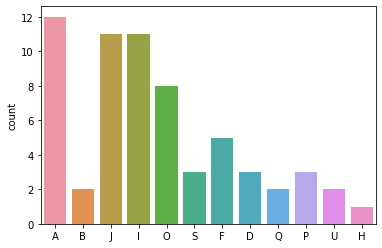

In [16]:
import seaborn as sns
sns.countplot(x=tokens);

가장 많은 빈도를 보이는 문자는 'A' 입니다. 우리는 이같이 복잡하고 섞여있는 문자들을 눈으로 직접 나누는 작업에 매우매우 취약합니다.
그래서 이 복잡한 데이터를 이해 쉽고 카운트를 하는 등 분석이 가능한 토큰으로 바꾸었습니다.

이러한 작업이 오늘 여러분과 다룰 핵심 내용입니다.

### 단어의 분산 표현
  다양한 색상으로 디스플레이가 되었습니다. 잠깐 색상에 대해서 얘기를 해볼까요? 섹션1에서 디스플레이 색상에 대해서 많이 배웠겠지만, 간단히 언급하면 색상은 정말 다양합니다. 파란색(blue)뿐만 아니라 하늘색(ski-blue)도 있죠. RGB라는 빛의 삼원색으로 구성하여 수많은 색상을 만들어낼 수 있습니다. 파란색, 하늘색이라는 이름대신에 3차원의 벡터형태로 색상을 표현할 수 있습니다. 또 색상을 정확하게 전달할 수 있는 능력도 가지고 있습니다. 디자이너와 혹시 대화할 기회가 생기면, 색상코드를 주고받을 일이 많이 생길텐데, 그만큼 명확한 특징도 없습니다. 
  이렇게 색처럼 단어도 이런 벡터로 표현할 수 있을까요? 벡터를 통해서 색상이 정해지듯이 단어도 정해질 수 있다는 것입니다. 그러면서도 그 의미가 정확하게 전달되어야겠죠. 이를 자연어 처리 분야에서는 단어의 분산표현(distributional representation)이라고 말합니다. 

### 분포 가설
  자연어 처리의 역사에서 벡터화 연구는 끊임없이 있었습니다. 간단한 아이디어에서 출발한 연구가 많았는데, 중요한 아이디어는 바로 단어의 물리적인 거리입니다. 단어의 의미는 주변 단어들에 의해서 형성된다는 것이죠. 이를 분포가설(Distributional hypothesis)이라고 합니다. 
  단어 자체의 의미보다는 그 단어가 사용된 맥락(context)가 중요하다는 것이죠. 의미가 같은 단어들은 같은 맥락에서 더 많이 등장하게 되는 것도 우리가 잘 알고 있습니다. 
  이후의 모델을 배울 때에도 이 맥락, Context에 대해서는 많이 다뤄질 예정입니다. 

#### 동시발생 행렬
  분포 가설을 기초로하여 단어를 벡터화하는 것을 생각해봅시다. 주변 단어를 '세어보는' 방법이 자연스럽게 떠오릅니다. 단어 하나를 선택하면, 그 단어 주변의 단어들이 어떻게 구성되어있는 지 알아보는 방법인 것이죠. 이를 '통계 기반(statistical based) 방법이라고 합니다. 

  <img src="https://i.stack.imgur.com/y3oku.png">

베스트 커플을 뽑아야 하는 설문조사 결과를 자동으로 분석해야 한다고 하면, 모든 조사 문항헤서 같이 언급된 이름의 빈도를 세어서 정리할 수 있다. 이런 그림이 동시발생행렬(co-occurrence matrix)라고 합니다. 

  이 외에도 문장 내에서 단어의 개수(TF), 여러 문장에서 사용된 단어와 그렇지 않는 단어(IDF)들 이런 특징을 이용해서 정보를 추출할 수도 있습니다. 이 내용은 다음 수업시간에 조금 더 자세히 배워보도록 하겠습니다. 

---

## 파이썬 기본 함수로 토큰화(Tokenizing)를 수행해 봅시다.

이번에는 단어들로 구성된 문장을 넣어 보겠습니다.

In [7]:
# 단어가 토큰입니다
words = "Constructor, Leadership, refer, Yeah, way to go, buddy!;"

##### 토큰을 Iterable 데이터 구조에 저장합니다.

파이썬에서 스트링 객체는 iterable 입니다. 하지만 지금 sample 은 단어 토큰이 아닌 문자가 반복되는 구조입니다.

In [8]:
type(words)

str

python `enumerate` 함수는 String, List 등 자료형을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴합니다.
for문에서 많이 쓰입니다.

In [9]:
enumerate(words)

In [10]:
for count, ele in enumerate(words[:5]): 
    print(count, ele)


0 C
1 o
2 n
3 s
4 t


In [11]:
list(enumerate(words))[:10]

[(0, 'C'),
 (1, 'o'),
 (2, 'n'),
 (3, 's'),
 (4, 't'),
 (5, 'r'),
 (6, 'u'),
 (7, 'c'),
 (8, 't'),
 (9, 'o')]

words 에서 의미 단위를 단어라고 했을 때, `.split()`를 사용해 공백으로 문장을 나누면 단어가 iterable 단위가 되어 리스트에 저장할 수 있습니다.

In [12]:
words.split(" ")

['Constructor,',
 'Leadership,',
 'refer,',
 'Yeah,',
 'way',
 'to',
 'go,',
 'buddy!;']

In [13]:
words.split(',')

['Constructor', ' Leadership', ' refer', ' Yeah', ' way to go', ' buddy!;']

#### 대소문자를 정제 합니다

가장 일반적인 토큰정제과정은 대소문자를 일치시키는 것입니다. 대소문자를 일치시켜 의미적으로 같은 여러 토큰을 한 토큰으로 만들 수 있습니다.

`.lower()`/`.upper()` 문자열 메소드를 사용해 소/대문자로 정제합니다.

예제에 사용할 데이터를 불러오겠습니다.

In [ ]:
# sampling from: 'https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products'
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/amazon/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19_sample.csv')

In [ ]:
df.shape

In [ ]:
df.head(3)

아마존 브랜드가 보이네요, 이상한 점을 찾아 보세요

In [ ]:
df['brand'].value_counts()

대소문자를 일치시켜 보겠습니다. 카테고리가 줄겠지요?

In [ ]:
df['brand'] = df['brand'].apply(lambda x: x.lower())
df['brand'].value_counts()

##### 알파벳/숫자만 남겨 봅시다.

이번에는 알파벳과 숫자만 남기기 원합니다. 문장 부호나 공백문자, 다른 기호들은 대부분 노이즈라고 볼 수 있습니다 (항상 그런 것은 아닙니다). 이번에는 `re` (regular expressions, 정규식) 패키지를 사용해서 정제를 해 보겠습니다.

사용할 정규식 표현은 `'[^a-zA-Z0-9 ]'` 입니다. 이 표현은 소문자(a-z), 대문자(A-Z), 숫자(0-9), 공백문자(space)를 제외한 모든 문자를 제거합니다.

- [참고: Python RegEx](https://www.w3schools.com/python/python_regex.asp#sub)
- [정규 표현식 시작하기](https://wikidocs.net/4308#_2)

In [ ]:
# 정규식 라이브러리
import re

# 정규식
# []: [] 사이 문자를 매치, ^: not
regex = r"[^a-zA-Z0-9 ]"

# 정규식을 적용할 스트링
test_str = ("(Natural Language Processing) is easy!, DS!\n")

# 치환할 문자
subst = ""

result = re.sub(regex, subst, test_str)

In [ ]:
result

#### 정규식 정의에서 치환까지 수행하는 tokenize 함수를 만들어 보세요.

In [ ]:
def tokenize(text):
    """text 문자열을 의미있는 단어 단위로 list에 저장합니다.
    Args:
        text (str): 토큰화 할 문자열
    Returns:
        list: 토큰이 저장된 리스트
    """
    # 정규식 적용
    tokens = re.sub(regex, subst, text)

    # 소문자로 치환
    tokens = tokens.lower().split()
    
    return tokens

In [ ]:
tokenize(test_str)

### 실제 데이터를 가지고 진행해 봅시다.

이번에는 아마존 제품에 리뷰 데이터 다루어 보겠습니다.
Alexa, Echo와 같은 아마존 제품에 대한 리뷰를 토큰화 하고 분석해보겠습니다!
- [Kaggle](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products/).

In [ ]:
from collections import Counter
import re
import pandas as pd

# squarify treemap
import squarify

import matplotlib.pyplot as plt
import seaborn as sns

# # spacy: NLP library
# import spacy
# from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

# # Load general-purpose pretrained models to predict named entities, part-of-speech tags and syntactic dependencies
# ## https://spacy.io/models
# ## python -m spacy download en_core_web_lg
# nlp = spacy.load("en_core_web_lg")

In [ ]:
df.head(2).T

reviews.text 문장의 단어를 카운트 해서 사용해 보겠습니다.

In [ ]:
df['reviews.text'].value_counts(normalize=True)[:10]

각 리뷰텍스트를 토크나이즈 하여 tokens 칼럼으로 만듭니다.

In [ ]:
df['tokens'] = df['reviews.text'].apply(tokenize)

In [ ]:
df['tokens'].head()

In [ ]:
df[['reviews.text', 'tokens']][:10]

어떤 카테고리가 있는지 살펴보겠습니다

In [ ]:
df['primaryCategories'].value_counts()

Electronics 카테고리에 해당하는 문장들만 제한해서 분석해보겠습니다.

In [ ]:

df = df[df['primaryCategories'] == 'Electronics']

In [ ]:
df.head(2)

#### 토큰을 분석해 봅시다.

Counter를 사용하여 모든 리뷰 토큰을 카운트 해보겠습니다.

In [ ]:
from collections import Counter

# Counter 객체는 리스트요소의 값과 요소의 갯수를 카운트 하여 저장하고 있습니다.
# 카운터 객체는 .update 메소드로 계속 업데이트 가능합니다.
word_counts = Counter()

# 토큰화된 각 리뷰 리스트를 카운터 객체에 업데이트 합니다. 
df['tokens'].apply(lambda x: word_counts.update(x))

# 가장 많이 존재하는 단어 순으로 10개를 나열합니다
word_counts.most_common(10)

the, and, a, is... 같은 어떤 문서에든지 많이 나타나는 단어들은 사실 큰 의미를 찾기 어려운 단어들 입니다.

이런 단어들을 **stopword(불용어)** 라고 합니다.

이와같은 프로세스를 사용해서 코퍼스의 전체 워드 카운트, 랭크 등 정보가 담긴 데이터프레임을 리턴하는 함수를 만들어 봅시다. 이 함수는 토큰화된 문서들이 들어있는 코퍼스를 입력으로 받습니다.

In [ ]:

def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [ ]:
wc = word_count(df['tokens'])

In [ ]:
wc.head()

In [ ]:
import seaborn as sns

# 누적분포그래프(CDF)
sns.lineplot(x='rank', y='cul_percent', data=wc);

In [ ]:
wc[wc['rank'] <= 1000]['cul_percent'].max()

In [ ]:
import squarify
import matplotlib.pyplot as plt

color=['viridis']

wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

### NLP 라이브러리(Spacy)를 사용해 텍스트 데이터를 처리해 보겠습니다.


Spacy(아직 한글 사전 학습 모델이 지원 안됩니다)는 문서 구성요소를 다양한 구조에 나누어 저장하는 대신, 요소를 색인화하고 검색정보를 간단히 저장합니다. 그래서 실제 배포 단계에서 NLTK 같은 라이브러리보다 Spacy가 유리할 수 있습니다.

- 참고: Spacy를 공부하기 위해 [Spacy course]('https://course.spacy.io/en/')

In [ ]:
# spacy.io
import spacy
from spacy.tokenizer import Tokenizer

# Load general-purpose pretrained models to predict named entities, part-of-speech tags and syntactic dependencies
## https://spacy.io/models
## python -m spacy download en_core_web_lg
nlp = spacy.load("en_core_web_lg")

# Tokenizer 생성
tokenizer = Tokenizer(nlp.vocab)

Spacy 모델에 문장을 넣어 보겠습니다

In [ ]:
doc = nlp('hello data science world!')

In [ ]:
type(doc)

In [ ]:
# https://spacy.io/usage/linguistic-features
# Text: The original word text.
# Lemma: The base form of the word.
# POS: The simple UPOS part-of-speech tag.
# Tag: The detailed part-of-speech tag.
# Dep: Syntactic dependency, i.e. the relation between tokens.
# Shape: The word shape – capitalization, punctuation, digits.
# is alpha: Is the token an alpha character?
# is stop: Is the token part of a stop list, i.e. the most common words of the language?
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

spacy로 토큰화를 수행합니다.

In [ ]:
# 토큰을 반환합니다
sample = "Constructor, Leadership, refer, Yeah, way to go, buddy!;"
[token.text for token in tokenizer(sample)]

tokenizer.pipe를 사용해서 토큰 스트림을 만듭니다.

In [ ]:
# Tokenizer Pipe

tokens = []

# 토큰화 (in stream process)
# .pipe streams input, and produces streaming output
for doc in tokenizer.pipe(df['reviews.text']):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens
df['tokens'].head()

In [ ]:
wc = word_count(df['tokens'])

In [ ]:
wc.head()

In [ ]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6 )
plt.axis('off')
plt.show()

## 불용어 (Stop Words) 처리

다음과 같은 내용을 배워보겠습니다: 
- 불용어는 무엇일까요?
- Spacy를 사용해 불용어를 처리하는 방법?
- 불용어 시각화
- 불용어 사전
- 불용어 확장
- 통계적 트리밍(trimming)


위에서 시각화한 단어 대부분은 제품 리뷰를 이해하는데 그다지 도움이 되지 않습니다. 'I', 'and', 'of' 같은 단어들은 리뷰 관점에서 아무런 의미가 없습니다. 이런 단어들을 우리는 **'Stop words(불용어)'** 라고 합니다. 왜냐하면 저 단어들을 분석할 때 넣지 않아야(stop) 하기 때문입니다.

대부분의 NLP 라이브러리는 **접속사, 관사, 부사, 대명사, 일반동사** 등을 포함한 일반적인 **불용어 사전**을 내장하고 있습니다. 가장 좋은 방법은 우리가 다루는 도메인에서 많이 나오는 불필요한 단어를 불용어 사전에 추가하여 **불용어 확장**을 하는 것 입니다. 예를 들어 지금 사용하는 아마존 데이터에서는 'Amazon' 이라는 단어가 상당히 많이 나올 텐데, 이처럼 우리가 분석할 때 큰 의미가 없어 보이는 단어들을 불용어로 확장해 사용하는 것 입니다.

### 기본 불용어

Spacy 모델에서 가져올 수 있는 기본 불용어를 확인해 보겠습니다.

In [ ]:
print(nlp.Defaults.stop_words)

In [ ]:
tokens = []
# 토큰에서 불용어 제거, 소문자화 하여 업데이트
for doc in tokenizer.pipe(df['reviews.text']):
    doc_tokens = []

    # A doc is a sequence of Token(<class 'spacy.tokens.doc.Doc'>)
    for token in doc:
        # 토큰이 불용어와 구두점이 아니면 저장
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [ ]:
df.tokens.head()

불용어들이 모두 제거가 되어 완전히 다른 단어들이 상위에서 보입니다.

In [ ]:
wc = word_count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

### 불용어 확장

중요하지 않지만 상위에 나오는 몇몇 단어들을 불용어에 추가해 보겠습니다.

In [ ]:
print(type(nlp.Defaults.stop_words))

In [ ]:
STOP_WORDS = nlp.Defaults.stop_words.union(['batteries','I', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this'])

In [ ]:
print(STOP_WORDS)

In [ ]:
tokens = []

for doc in tokenizer.pipe(df['reviews.text']):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [ ]:
wc = word_count(df['tokens'])
wc.head()

In [ ]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

추가적으로 킨들의 리뷰와 전체 리뷰의 토큰을 비교해 보겠습니다.

In [ ]:
df['kindle'] = df['name'].str.contains('kindle', case=False)

In [ ]:
wc_kindle = word_count(df[df['kindle'] == 1]['tokens'])
wc.shape, wc_kindle.shape

In [ ]:
wc_top20 = wc[wc['rank'] <= 20]
wc_kindle_top20 = wc_kindle[wc_kindle['rank'] <= 20]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0].set_title('All Reviews')
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6, ax=axes[0], text_kwargs={'fontsize':14})
axes[0].axis('off')

axes[1].set_title('Kindle Reviews')
squarify.plot(sizes=wc_kindle_top20['percent'], label=wc_kindle_top20['word'], alpha=0.6, ax=axes[1], text_kwargs={'fontsize':14})
axes[1].axis('off')

plt.show()

### 통계적 트리밍(Trimming)

기존에 알려진 불용어를 제거하는 대신 코퍼스에서 통계적인 방법을 통해 단어를 제거하는 방법이 있습니다.

단어들의 누적분포 그래프를 다시 보겠습니다.

In [ ]:
sns.lineplot(x='rank', y='cul_percent', data=wc);

이 그래프에서 알 수 있는 것은 몇몇 소수의 단어들이 전체 코퍼스의 80%를 차지한다는 것입니다. 이런 현상은 다음과 같이 두 가지로 해석할 수 있습니다.

1. 자주 나타나는 단어들(그래프의 왼쪽)은 여러 문서에 두루 나타나기 때문에 문서의 의미를 이해하는데 통찰력을 제공하지 않습니다.
2. 자주 나타나지 않는 단어들(그래프의 오른쪽)도 역시 너무 드믈게 나타나기 때문에 큰 의미가 없을 확률이 높습니다.

랭크가 높거나 낮은 단어들을 한 번 살펴 보고 제거해 봅시다:

In [ ]:
wc.tail(20)

In [ ]:
wc['word_in_docs_percent'].describe()

In [ ]:
wc['word_in_docs_percent']

In [ ]:
# 문서에 나타나는 빈도
sns.displot(wc['word_in_docs_percent'],kind='kde');

In [ ]:
# 최소한 1% 이상 문서에 나타나는 단어들만 선택합니다.

wc = wc[wc['word_in_docs_percent'] >= 0.01]

sns.displot(wc['word_in_docs_percent'], kind='kde');

In [ ]:
wc.shape

In [ ]:
wc

## 표제어추출(lemmatization)과 어간추출(stemming) 하기

토큰화된 단어들을 보면, 조금 더 수정이 필요한 부분이 보입니다. 예를 들어 'batteries' 와 'battery'를 보면 이 둘은 어근(root)이 같은 단어입니다.
이런 단어들을 표제어추출(lemmatization) 이나 어간추출(stemming)을 통해 추출 하게 됩니다.

### Stemming(어간추출)

- [PorterStemmer](https://tartarus.org/martin/PorterStemmer/)

> 어간(stem): 단어의 의미가 포함된 부분으로 접사등이 제거된 형태 입니다. 어근이나 단어의 원형과 같지 않을 수 있습니다.
> 예를 들어 argue, argued, arguing, argus의 어간은 단어들의 뒷 부분이 제거된 argu가 어간입니다.

다음과 같은 부분을 제거합니다:
- 'ing'
- 'ed'
- 's'

Stemming 방법은 Porter, Snowball, Dawson 등 알고리즘으로 잘 정립되어 있습니다. 이 알고리즘들에 대한 더 자세한 정보는 다음을 참고하세요. 
- [A Comparative Study of Stemming Algorithms](https://pdfs.semanticscholar.org/1c0c/0fa35d4ff8a2f925eb955e48d655494bd167.pdf) 


Spacy는 Stemming을 제공하지 않고 **lemmatization**만 제공하기 때문에, `nltk` 를 사용해 stemming을 진행해 보겠습니다.

In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

words = ["wolf", "wolves"]

for word in words:
    print(ps.stem(word))

### 아마존 리뷰데이터를 Stemming 해 봅시다.

In [ ]:
tokens = []
for doc in df['tokens']:
    doc_tokens = []
    for token in doc:
        doc_tokens.append(ps.stem(token))
    tokens.append(doc_tokens)

df['stems'] = tokens

In [ ]:
wc = word_count(df['stems'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6 )
plt.axis('off')
plt.show()

### Lemmatization(표제어 추출)

Porter 알고리즘은 단지 단어의 끝 부분을 자르는 역할을 합니다. 그래서 사전에도 없는 단어가 많이 나오게 됩니다. 조금 이상하긴 해도 현실적으로 사용하기에 Stemming 은 성능이 나쁘지 않습니다. 알고리즘이 간단해 매우 빠르기 때문에 검색엔진과 정보검색 분야에서 많이 사용하고 있습니다.

Lemmatization은 어간추출보다 체계적입니다. 단어들은 기본 사전형 단어 형태인 lemma(표제어)로 변환됩니다. 명사의 복수형은 단수형으로, 동사는 모두 타동사로 변환됩니다. 이렇게 단어들로부터 표제어를 찾아가는 과정은 Stemming 보다 많은 연산이 필요합니다. 그럼 Stacy를 통해 Lemmatization을 진행해 보겠습니다.


In [ ]:
lem = "The social wolf. Wolves are complex."

nlp = spacy.load("en_core_web_lg")

doc = nlp(lem)

# wolf, wolve가 어떤 Lemma로 추출되는지 확인해 보세요
for token in doc:
    print(token.text, "  ", token.lemma_)

In [ ]:
# Lemmatization 과정을 함수로 만들어 봅시다
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)

    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [ ]:
df['lemmas'] = df['reviews.text'].apply(get_lemmas)

In [ ]:
df['lemmas'].head()

In [ ]:
wc = word_count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6 )
plt.axis('off')
plt.show()

## 참고자료

- [Spacy 101](https://course.spacy.io)
- [NLTK Book](https://www.nltk.org/book)
- [An Introduction to Information Retrieval](https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf)
- [regex101.com(정규식 연습)](https://regex101.com/)
- [Python RegEx](https://www.w3schools.com/python/python_regex.asp#sub)
- [정규 표현식 시작하기](https://wikidocs.net/4308#_2)